# Patient Examples: Plotting Urine and Dosage Trends
In this notebook we will go through plotting some examples of patients that have upward or downward trends in Urine Concentration and Dosage. The main takeaway from this notebook: how to parse the csv file and plot a select sample of patients.

### Steps
* Import libraries
* Filter for the specified patients
* Select the relevent columns for Urine and Dosage
* Plot the patients using matplotlib

In [49]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load dataframe
DATA_DIR = '../data'
dataset = os.path.join(DATA_DIR, 'dta_file_converted.csv')

df = pd.read_csv(dataset, low_memory=False)

In [5]:
df.head()

,Unnamed: 0,ices_caseid,ices_age,ices_sex,ices_othersex,ices_maristatus,ices_addcomm1,ices_childstatus,ices_numchild,ices_addcommch,...,ices_doseaddcomm2,ices_urinelabel,ices_addcomm3,ices_dosetime3,ices_addcomm6,ices_dosetime6,ices_addcomm9,ices_dosetime9,ices_addcomm12,ices_dosetime12
0,0,100001,27.0,1.0,NaN,2.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,100002,23.0,1.0,NaN,0.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,100003,34.0,1.0,NaN,0.0,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,100005,36.0,0.0,NaN,1.0,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,100006,50.0,0.0,NaN,2.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Patient with Clear Upward/Downward Trends

For simplicity we will use `ices_caseid` as the key, all indices have been converted.

|          | Urine    | Dosage |
|----------|----------|----------|
| Downward |  <ul><li>100027 <li> 100029 <li>100057 <li>100109 <li>100169</ul> | <ul><li>100001 <li>032-0024 <li>032-0087</ul> |
| Upward   | <ul> <li>100050 </ul> | <ul> <li>032-0090 <li>032-0121 </ul>

In [6]:
# Specific Users selected by Group A and Group B

urine_down = '100027 100029 100057 100109 100169'.split()
urine_up = '100050'.split()

dosage_down = '100001 032-0024 032-0087'.split()
dosage_up = '032-0090 032-0121'.split()

print("Urine Downtrend: {}".format(urine_down))
print("Urine Uptrend: {}".format(urine_up))
print("Dosage Downtrend: {}".format(dosage_down))
print("Dosage Uptrend: {}".format(dosage_up))

Urine Downtrend: ['100027', '100029', '100057', '100109', '100169']
Urine Uptrend: ['100050']
Dosage Downtrend: ['100001', '032-0024', '032-0087']
Dosage Uptrend: ['032-0090', '032-0121']


In [7]:
# Columns for tracking Urine and Dosage

urine_col = ['ices_caseid',
             'ices_amountdose',
             'ices_currdose3', 
             'ices_currdose6', 
             'ices_currdose9', 
             'ices_currdose12']

dosage_col = ['ices_caseid', 
              'ices_opioidbase',
              'ices_opioid3', 
              'ices_opioid6', 
              'ices_opioid9', 
              'ices_opioid12']


In [22]:
# Separate dataframes by feature and trend

df_urine_down = df.loc[df.ices_caseid.isin(urine_down), urine_col]
df_urine_up = df.loc[df.ices_caseid.isin(urine_up), urine_col]

df_dosage_down = df.loc[df.ices_caseid.isin(dosage_down), dosage_col]
df_dosage_up = df.loc[df.ices_caseid.isin(dosage_up), dosage_col]

## Plot Patient Examples

In [114]:
# These are the columns used to label x-axis and y-axis

x_urine_cols = ['Base', '3 M', '6 M', '9 M', '12 M']
y_urine_cols = 'ices_amountdose ices_currdose3 ices_currdose6 ices_currdose9 ices_currdose12'.split()

x_dosage_cols = x_urine_cols
y_dosage_cols = ['ices_opioidbase','ices_opioid3', 'ices_opioid6', 'ices_opioid9', 'ices_opioid12']

Text(0, 0.5, 'Urine')

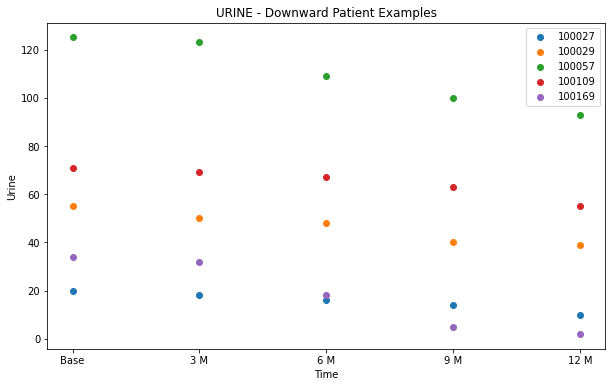

In [97]:
fig,ax = plt.subplots(figsize=(10,6))

# Iterate through the dataframe and plot each row
for row in df_urine_down.iterrows():
    data = row[1]
    ax.scatter(x=x_urine_cols, y=data[y_urine_cols], label=data['ices_caseid'])

ax.legend()
ax.set_title('URINE - Downward Patient Examples')
ax.set_xlabel('Time')
ax.set_ylabel('Urine')

Text(0, 0.5, 'Urine')

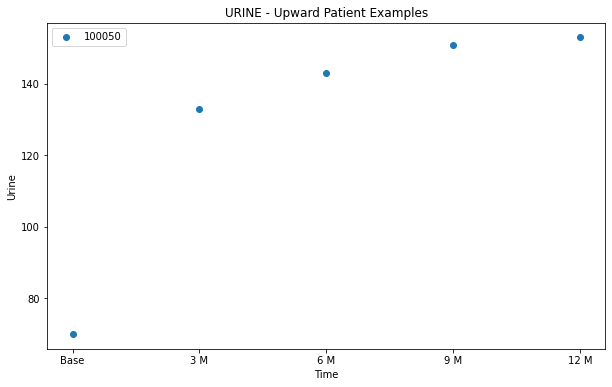

In [98]:
fig,ax = plt.subplots(figsize=(10,6))

for row in df_urine_up.iterrows():
    data = row[1]
    ax.scatter(x=x_urine_cols, y=data[y_urine_cols], label=data['ices_caseid'])

ax.legend()
ax.set_title('URINE - Upward Patient Examples')
ax.set_xlabel('Time')
ax.set_ylabel('Urine')

Text(0, 0.5, 'Dosage')

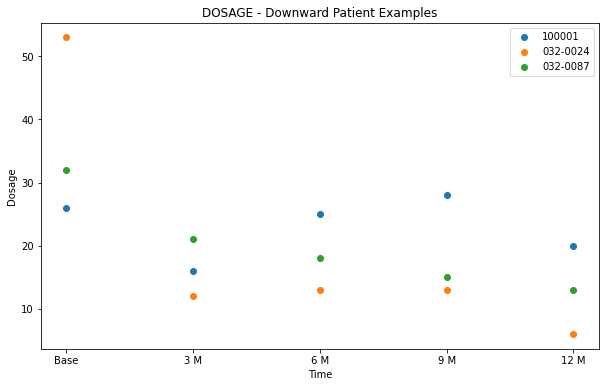

In [103]:
fig,ax = plt.subplots(figsize=(10,6))

for row in df_dosage_down.iterrows():
    data = row[1]
    ax.scatter(x=x_dosage_cols, y=data[y_dosage_cols], label=data['ices_caseid'])

ax.legend()
ax.set_title('DOSAGE - Downward Patient Examples')
ax.set_xlabel('Time')
ax.set_ylabel('Dosage')

Text(0, 0.5, 'Dosage')

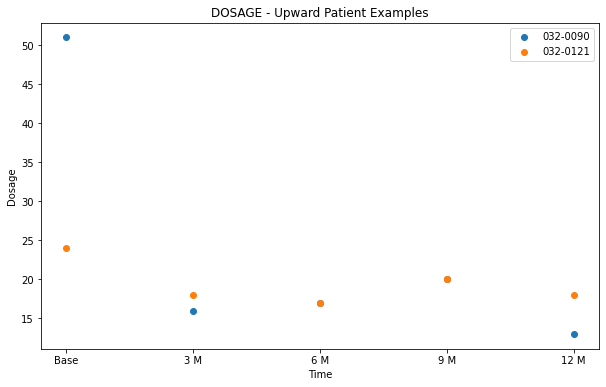

In [104]:
fig,ax = plt.subplots(figsize=(10,6))

for row in df_dosage_up.iterrows():
    data = row[1]
    ax.scatter(x=x_dosage_cols, y=data[y_dosage_cols], label=data['ices_caseid'])

ax.legend()
ax.set_title('DOSAGE - Upward Patient Examples')
ax.set_xlabel('Time')
ax.set_ylabel('Dosage')